In [ ]:
pip install nltk==3.3

In [ ]:
pip install vaderSentiment

     |████████████████████████████████| 133kB 6.1MB/s 


In [ ]:
%matplotlib inline
import string
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=14)
matplotlib.rc('ytick', labelsize=14)
import pandas as pd
import gzip
import nltk
from nltk.corpus import stopwords
import collections,re
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


http://jmcauley.ucsd.edu/data/amazon/

In [ ]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:


def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/content/drive/My Drive/Group66/Dataset/reviews_Home_and_Kitchen_5.json.gz')

## New Section

In [ ]:
df.iloc[3,4]

'This book is a must have if you get a Zoku (which I also highly recommend). There is a large variety of recipes from simple, to fancy. The flavor combos are creative, and it gives you ideas for decorating the pops too. They turn out as beautiful as they are tasty. After reading it you will be inspired to create your own recipes too.'

In [ ]:
reviews=df['reviewText']
reviews=reviews.apply(lambda row : row.lower())

In [ ]:
reviews.iloc[10]

'the recipes in this books are tedious to make. i found that easier and simpler recipes can be found online. i had no problem with the recipes online working in the zoku maker.'

In [ ]:
def negationhand(review):
  list1=[]
  if review!="":
    list1=review.split()
    total_counts = len(list1)
    # print(list1)
    for i in list1:
      if "n\'t" in i:
        x=i.partition("n\'t")[0]
        review=review.replace(i,x+" not")
     #   print(review)
      elif "n\'" in i:
        x=i.partition("n\'t")[0]
        review=review.replace(i,x+" not")
     #   print(review)
      if "never" in i or "no" in i:
        review=review.replace(i,"not")
  return review

In [ ]:
reviews[7]

'i bought this when i bought the pop maker. i think the recipes are fine, but there really isn\'t much in the book i wouldn\'t have figured out myself.a couple of good creamy recipes that are now available for free on recipe websites. as for "pop embellishing" well, that wasn\'t too hard to figure out, either. i\'d save the money and spend it instead on extra pop sticks, which seem to disappear the way socks do....'

In [ ]:
negationhand(reviews[7])

'i bought this when i bought the pop maker. i think the recipes are fine, but there really is not much in the book i would not have figured out myself.a couple of good creamy recipes that are not available for free on recipe websites. as for "pop embellishing" well, that was not too hard to figure out, either. i\'d save the money and spend it instead on extra pop sticks, which seem to disappear the way socks do....'

In [ ]:
def removeStopWords(stopWords, txt):
    newtxt=[]
    for i in range(len(txt)):
      if txt[i] !='':
        newtxt.append(' '.join([word for word in txt[i].split() if word not in stopWords]))

    return newtxt

In [ ]:
stops = stopwords.words("english")
stops.remove("not")
stops

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
corpus = []
for i in range(0,100000):
    review=negationhand(reviews[i])
    review = review.split('.')
    if len(review)>3:
      review =review[:3]
    tokenizer = nltk.RegexpTokenizer(r"\w+")
    review = [' '.join(tokenizer.tokenize(i)) for i in review]
    review = [re.sub(r'\d+','', i) for i in review]
    review=removeStopWords(stops,review)
    corpus.append(review)

In [ ]:
corpus

[['daughter wanted book price amazon best',
  'already tried one recipe day receiving book',
  'seems happy'],
 ['bought zoku quick pop daughterr zoku quick maker',
  'loves fun make ice cream'],
 ['nott shortage pop recipes available free web purchased zoku quick pops book zoku good recipes fruit pops blog',
  'hoping came',
  'book emphasizes sweet dessert pops however'],
 ['book must get zoku also highly recommend',
  'large variety recipes simple fancy',
  'flavor combos creative gives ideas decorating pops'],
 ['cookbook great',
  'really enjoyed reviewing recipes',
  'sure difficult others nice variety book'],
 ['zoku quick pop maker two'],
 ['book beautifully illustrated easy follow',
  'helps understand zoku better',
  'might even better made recipe units different sized molds'],
 ['bought bought pop maker',
  'think recipes fine really not much book would not figured',
  'couple good creamy recipes not available free recipe websites'],
 ['zoku accessories pricey recipes exact 

In [ ]:
corpus[0][0]

'daughter wanted book price amazon best'

## POS

In [ ]:

text = word_tokenize(reviews[0])
a=nltk.pos_tag(text)
# text = word_tokenize(list2[0])
# b=nltk.pos_tag(text)

In [ ]:
a

[('my', 'PRP$'),
 ('daughter', 'NN'),
 ('wanted', 'VBD'),
 ('this', 'DT'),
 ('book', 'NN'),
 ('and', 'CC'),
 ('the', 'DT'),
 ('price', 'NN'),
 ('on', 'IN'),
 ('amazon', 'NN'),
 ('was', 'VBD'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('.', '.'),
 ('she', 'PRP'),
 ('has', 'VBZ'),
 ('already', 'RB'),
 ('tried', 'VBN'),
 ('one', 'CD'),
 ('recipe', 'NN'),
 ('a', 'DT'),
 ('day', 'NN'),
 ('after', 'IN'),
 ('receiving', 'VBG'),
 ('the', 'DT'),
 ('book', 'NN'),
 ('.', '.'),
 ('she', 'PRP'),
 ('seems', 'VBZ'),
 ('happy', 'JJ'),
 ('with', 'IN'),
 ('it', 'PRP'),
 ('.', '.')]

In [ ]:

def preprocess_tags(a):
  list1=[]
  for i in a:
    if i[1] in ['JJ','JJR','JJS','RB','RBR','RBS','VBD','VBG','VBZ','WRB']:
      list1.append(i[0])
  return ' '.join(list1)


In [ ]:
xxx=corpus

In [ ]:
for i in range(len(corpus)):
  for j in range(len(xxx[i])):
    text = word_tokenize(xxx[i][j])
    b=nltk.pos_tag(text)
    xxx[i][j]=preprocess_tags(b)


In [ ]:
len(xxx)

100000

In [ ]:
import collections

def createcol(n):
  flatList = [ item for elem in xxx for item in elem]
  co=[]
  for i in flatList:
    co.append(i.split())

  list1= [ item for elem in co for item in elem]

  ctr = collections.Counter(list1)
  d=dict(ctr)
  sort_d = sorted(d.items(), key=lambda x: x[1], reverse=True)

  sort_d[:n]
  d1=dict(sort_d)

  col=list(d1.keys())

  return d1

def createvector(lol,col):
  fin=[]
  for sen in lol:
    s=""
    li=[]
    for x in sen:
      li=li+x.split()
    for i in col:
      if i in li:
        s=s+"1"
      else:
        s=s+"0"
    #print(s)   # CAN REMOVE IN FUTURE
    fin.append(s)
  df=pd.DataFrame(fin,columns=["vector"])
 #based on col
  return df


In [ ]:
test=xxx[:10]
test

[['wanted best', 'already tried receiving', 'seems happy'],
 ['quick', ''],
 ['nott available free purchased quick good',
  'hoping came',
  'emphasizes sweet however'],
 ['also highly', 'large simple fancy', 'creative gives decorating'],
 ['great', 'really', 'sure difficult nice'],
 ['quick'],
 ['beautifully illustrated easy', '', 'even better recipe different sized'],
 ['bought bought', 'really not much not', 'good not available free'],
 ['exact', 'far'],
 ['high', 'clear helpful clearly outlined', 'highly recommend']]

In [ ]:
col=createcol(18345)
col

{'not': 75885,
 'great': 19900,
 'well': 15290,
 'good': 13353,
 'easy': 11639,
 'really': 8712,
 'much': 8517,
 'bought': 8489,
 'little': 8229,
 'nice': 6976,
 'using': 6789,
 'first': 6692,
 'small': 6063,
 'even': 5774,
 'got': 5672,
 'also': 5660,
 'nott': 5614,
 'makes': 5354,
 'clean': 5345,
 'works': 4762,
 'better': 4709,
 'still': 4559,
 'best': 4509,
 'old': 4402,
 'many': 4346,
 'perfect': 4174,
 'long': 4023,
 'new': 3979,
 'hot': 3877,
 'large': 3848,
 'last': 3762,
 'made': 3730,
 'heavy': 3665,
 'easily': 3492,
 'big': 3441,
 'several': 3358,
 'looking': 3352,
 'right': 3302,
 'always': 3192,
 'making': 3177,
 'far': 2843,
 'top': 2819,
 'ago': 2786,
 'ever': 2764,
 'hard': 2735,
 'perfectly': 2589,
 'however': 2532,
 'happy': 2528,
 'pretty': 2521,
 'cooking': 2511,
 'came': 2498,
 'oven': 2474,
 'back': 2467,
 'sure': 2455,
 'high': 2417,
 'sharp': 2384,
 'different': 2359,
 'put': 2334,
 'quite': 2327,
 'wanted': 2288,
 'lid': 2268,
 'getting': 2256,
 'almost': 2231,

In [ ]:
df1=createvector(xxx[:1000],col)

In [ ]:
df1

,vector
0,0000000000000000000000100000000000000000000000...
1,0000000000000000000000000000000000000000000000...
2,0001000000000000100000000000000000000000000000...
3,0000000000000001000000000000010000000000000000...
4,0100010001000000000000000000000000000000000000...
...,...
995,1000000000000000000000000010000000000000000000...
996,0000010001000000000000000000000000000000000000...
997,0100000001000000000000000000000000000000000000...
998,1100000000000000000000000000000000000000000000...


In [ ]:
len(xxx)

100000

In [ ]:
for i in range(99):
  df1=pd.concat([df1,createvector(xxx[(i+1)*1000:(i+2)*1000],col)])

df1


,vector
0,0000000000000000000000100000000000000000000000...
1,0000000000000000000000000000000000000000000000...
2,0001000000000000100000000000000000000000000000...
3,0000000000000001000000000000010000000000000000...
4,0100010001000000000000000000000000000000000000...
...,...
995,0000000000000000000000000000000000000000000000...
996,0011100000000100101010100000000100000000000000...
997,0000010000000001000000000000000000000000000000...
998,1000000100001000000100000000000000100000000001...


In [ ]:
df1['index']=[i for i in range(len(df1))]

In [ ]:
df1.set_index('index',inplace=True)

In [ ]:
df1['hash']=[hash(i) for i in df1['vector']]

In [ ]:
df1

,vector,hash,senti_score,Target
index,,,,
0,0000000000000000000000100000000000000000000000...,-4711152251763951052,0.166667,0
1,0000000000000000000000000000000000000000000000...,-7421737543016344507,0.000000,0
2,0001000000000000100000000000000000000000000000...,5919205551824475480,0.169643,0
3,0000000000000001000000000000010000000000000000...,-6979483231287285213,0.125000,0
4,0100010001000000000000000000000000000000000000...,-2648740780831901172,0.125000,0
...,...,...,...,...
99995,0000000000000000000000000000000000000000000000...,-907961977703181560,0.000000,0
99996,0011100000000100101010100000000100000000000000...,-137235504485979276,0.207937,0
99997,0000010000000001000000000000000000000000000000...,-4631189845861197178,0.000000,0


In [ ]:
positive=pd.read_csv('/content/drive/My Drive/Group66/Dataset/positive-words.txt',header=None)


In [ ]:
negative=pd.read_csv('/content/drive/My Drive/Group66/Dataset/negative-words.txt',encoding='latin',header=None)

In [ ]:
pos=list(positive.iloc[:,0])
neg=list(negative.iloc[:,0])

In [ ]:
def sentim_score(review):
  senti_score=0
  sent=0
  list1=[]
  for j in review:
    positive_counts = 0
    negative_counts = 0
    if j !='':
      list1=j.split(' ')
      total_counts = len(list1)
      for i in list1:
        if i in pos and i !='':
          positive_counts+=1
        if i in neg and i !='':
          negative_counts+=1
      senti_score=senti_score+((positive_counts-negative_counts)/(1+total_counts))
  sent=senti_score/(1+len(review))
  return sent


In [ ]:
def negsentim(review):
  senti_score=0
  sent=0
  list1=[]
  for j in review:
    positive_counts = 0
    negative_counts = 0
    if j!='':
     # print(j)
      list1=j.split()
      total_counts = len(list1)
      x=0
      for i in list1:
        if i=="not":
          x=1
        else:
          if i in pos and i !='':
            positive_counts+=1
            if x==1:
              positive_counts-=1
              negative_counts+=1
              x=0
          if i in neg and i !='':
            negative_counts+=1
            if x==1:
              negative_counts-=1
              positive_counts+=1
              x=0
     # print(list1)
      senti_score=senti_score+((positive_counts-negative_counts)/(1+total_counts))
  sent=senti_score/(1+len(review))
  return sent

In [ ]:
df1['senti_score']=[negsentim(i) for i in corpus[:len(df1)]]

In [ ]:
df1[(df1["senti_score"]<0)]

,vector,hash,senti_score
index,,,
10,1000000000000000000000000000000000000000000000...,-3180764487974953569,-0.041667
20,1000001000000000000000000000000000000000000000...,4537191338332309274,-0.050000
45,0000001000001000000000000000000000000000000010...,-2001313859206109057,-0.047619
48,1001010000000000000000000000000000000000000100...,-1811504093859579442,-0.041667
57,1001000000000000000000000000000000000000000000...,3259087630428618919,-0.125000
...,...,...,...
99954,1000000000000000100000000000000010000000000000...,-6964003311938357347,-0.050000
99967,1000000000000010000000000000000000000000000000...,-8456968216331154922,-0.035714
99971,1000000000000000000000000000000000000000001000...,2849021609539277204,-0.062500


In [ ]:
df1['Target']=[0 for i in df1['hash']]

In [ ]:
import vaderSentiment.vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)



    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        return "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        return "Negative"

    else :
        return "Neutral"

In [ ]:
for i in range(100000):
  df1['Target'][i]=sentiment_scores(reviews[i])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
df1[df1['Target']=='Neutral']

,vector,hash,senti_score,Target
index,,,,
23,0000000000000010000000000000000000000000000000...,-348612445302457683,0.122222,Neutral
40,0000000000000000000000000000000000000000000000...,214467663820201140,0.000000,Neutral
66,0000001000000000000000000000000000000000000000...,8851240753124059338,0.100000,Neutral
67,0000000100000000000000000000000000000000000000...,-3054770014267424904,0.000000,Neutral
69,1000000000000000000000000000000000000000000000...,3973849717080406252,0.000000,Neutral
...,...,...,...,...
99708,1000000000000101000000000000000000000000000000...,-2001436870369760536,0.015625,Neutral
99714,0000000000100000000001000000000000000000000000...,1456043868256262776,0.000000,Neutral
99806,1000000100000000000000000001000000000000000000...,5829283507810180401,0.000000,Neutral


In [ ]:
len(df1)

100000

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


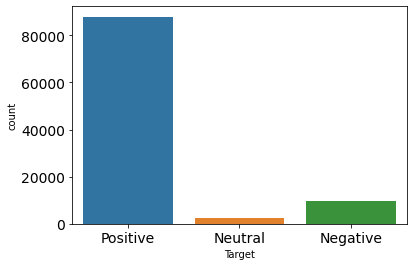

In [ ]:
import seaborn as sns
sns.countplot(df1["Target"])

In [ ]:
reviews[15966]

"i don't know why this thing got bad reviews. it works just fine for me. only thing is, and this is for all britas, you can't pour water our while its filtering the water, or it will spill out. never had it leak and its been months, plus it holds plenty of water for me. i like that's it's smaller because i keep it at my desk"

In [ ]:
df1[df1['senti_score']<0].count()

vector         15029
hash           15029
senti_score    15029
Target         15029
dtype: int64

In [ ]:
df1["senti_score"].max()

0.5208333333333333

In [ ]:
df1["senti_score"].min()

-0.375

In [ ]:
a=['admire clean enjoy fine','fond grin hot hero','improve honor holy happy']

In [ ]:
sentim_score(a)

0.6000000000000001

In [ ]:
b=["abuses ache allergy","bore anger beware","bump cheat cheap cons"]

In [ ]:
sentim_score(b)

-0.575

In [ ]:
import numpy as np
import pandas as pd
import keras
import keras.backend as kb
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
neg=df1[(df1["Target"]=='Negative')]
pos=df1[(df1["Target"]=='Positive')]
neu=df1[(df1["Target"]=='Neutral')]


In [ ]:
!cp output.xlsx "drive/My Drive/"

In [ ]:
df1

,vector,hash,senti_score,Target
index,,,,
0,0000000000000000000000001000000000000000000000...,-5058903848204240202,0.166667,Positive
1,0000000000000000000000000000000000000000000000...,-1043188131462263151,0.000000,Positive
2,0001000000000000000000000000000000000000000000...,-4294651055425922946,0.187500,Positive
3,0000000000000010000000000000010000000000000000...,-5565198879892486656,0.125000,Positive
4,0100010001000000000000000000000000000000000000...,7046829198181365596,0.125000,Positive
...,...,...,...,...
99995,0000000000000000000000000000000000000000000000...,-8070145342251223894,0.000000,Positive
99996,1011100000000001100010001000000100000000000000...,5744058552274830792,0.134921,Positive
99997,0000010000000010000000000000000000000000000000...,-7699508390804763973,0.000000,Positive


In [ ]:
mini=min(len(neg),len(pos),len(neu))
neg1=neg.head(mini)
pos1=pos.head(mini)
neu1=neu.head(mini)
new=pd.concat([neg1,pos1,neu1])

In [ ]:

new1=new.drop('vector',axis=1)

In [ ]:
new1

,hash,senti_score,Target
index,,,
28,-7763506824970608702,0.000000,Negative
59,8165393088201912132,-0.055556,Negative
60,7462779053321821028,-0.025000,Negative
72,3966646755395918584,-0.133333,Negative
118,5740783021863516247,0.125000,Negative
...,...,...,...
99708,4410042291658371610,0.015625,Neutral
99714,1558675329125787454,0.000000,Neutral
99806,-7759367397019110885,0.000000,Neutral


In [ ]:
dff1=new

In [ ]:
dff1=new.drop('vector',axis=1)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


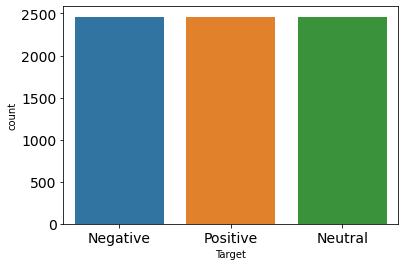

In [ ]:
import seaborn as sns





sns.countplot(new["Target"])
plt.show();


In [ ]:
# X=np.array(X).reshape(100000,2,1)
# dff1[['Positive','Negative','Neutral']]=pd.get_dummies(dff1['Target'])
# dff1.drop('Target',axis=1,inplace=True)
y=np.array(dff1[['Positive','Negative','Neutral']]).reshape(len(dff1),3)

y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0]], dtype=uint8)

In [ ]:
X

,hash,senti_score
index,,
28,-7763506824970608702,0.000000
59,8165393088201912132,-0.055556
60,7462779053321821028,-0.025000
72,3966646755395918584,-0.133333
118,5740783021863516247,0.125000
...,...,...
99708,4410042291658371610,0.015625
99714,1558675329125787454,0.000000
99806,-7759367397019110885,0.000000


In [ ]:
dff1

,hash,senti_score,Positive,Negative,Neutral
index,,,,,
28,-7763506824970608702,0.000000,1,0,0
59,8165393088201912132,-0.055556,1,0,0
60,7462779053321821028,-0.025000,1,0,0
72,3966646755395918584,-0.133333,1,0,0
118,5740783021863516247,0.125000,1,0,0
...,...,...,...,...,...
99708,4410042291658371610,0.015625,0,1,0
99714,1558675329125787454,0.000000,0,1,0
99806,-7759367397019110885,0.000000,0,1,0


In [ ]:
X=dff1.drop(['Positive','Negative','Neutral'],axis=1)
X['hash']=X['hash'].astype(int)
X=np.array(X['senti_score']).reshape(len(X),1,1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6644, 1, 1) (739, 1, 1) (6644, 3) (739, 3)


In [ ]:
import numpy as np
import pandas as pd
import keras
import keras.backend as kb
import tensorflow as tf
import numpy as np

In [ ]:
from keras.layers import Input
model = keras.Sequential([
     keras.layers.LSTM(64, activation=tf.nn.relu,input_shape=(1,1)),
    keras.layers.Dense(32, activation=tf.nn.sigmoid),
    keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(8, activation=tf.nn.sigmoid),
    keras.layers.Dense(3,activation=tf.nn.softmax)
  ])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=25)


In [ ]:
a=model.predict(X_test)
predict_class = np.argmax(a, axis=1)
predict_class = predict_class.tolist()

In [ ]:
pd.DataFrame(predict_class).value_counts()

1    383
2    194
0    162
dtype: int64

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

24/24 [==============================] - 0s 1ms/step - loss: 1.0037 - accuracy: 0.5156
Test Loss: 1.0037298202514648
Test Accuracy: 0.515561580657959


Full sample

In [ ]:
fin=df1.drop('vector',axis=1)
fin[['Positive','Negative','Neutral']]=pd.get_dummies(fin['Target'])

In [ ]:
# X=np.array(X).reshape(100000,2,1)
# dff1[['Positive','Negative','Neutral']]=pd.get_dummies(dff1['Target'])
# dff1.drop('Target',axis=1,inplace=True)
y=np.array(fin[['Positive','Negative','Neutral']]).reshape(len(fin),3)

y

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       ...,
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [ ]:
X=fin.drop(['Positive','Negative','Neutral'],axis=1)
X['hash']=X['hash'].astype(int)
X=np.array(X['senti_score']).reshape(len(X),1,1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90000, 1, 1) (10000, 1, 1) (90000, 3) (10000, 3)


In [ ]:
import numpy as np
import pandas as pd
import keras
import keras.backend as kb
import tensorflow as tf
import numpy as np

In [ ]:
from keras.layers import Input
model = keras.Sequential([
     keras.layers.LSTM(64, activation=tf.nn.relu,input_shape=(1,1)),
    keras.layers.Dense(32, activation=tf.nn.sigmoid),
    keras.layers.Dense(16, activation=tf.nn.sigmoid),
    keras.layers.Dense(8, activation=tf.nn.sigmoid),
    keras.layers.Dense(3,activation=tf.nn.softmax)
  ])
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,epochs=25)

# classifier.compile( loss='sparse_categorical_crossentropy',
#               optimizer=Adam(lr=0.001, decay=1e-6),
#               metrics=['accuracy'] )
# classifier.fit(X_train,
#          y_train,
#           epochs=3,
#           validation_data=(X_test, y_test))

Epoch 1/25
2813/2813 [==============================] - 6s 2ms/step - loss: 0.4612 - accuracy: 0.8561
Epoch 2/25
2813/2813 [==============================] - 5s 2ms/step - loss: 0.3945 - accuracy: 0.8784
Epoch 3/25
2813/2813 [==============================] - 6s 2ms/step - loss: 0.3932 - accuracy: 0.8784
Epoch 4/25
2813/2813 [==============================] - 5s 2ms/step - loss: 0.3929 - accuracy: 0.8784
Epoch 5/25
2813/2813 [==============================] - 5s 2ms/step - loss: 0.3926 - accuracy: 0.8784
Epoch 6/25
2813/2813 [==============================] - 6s 2ms/step - loss: 0.3921 - accuracy: 0.8784
Epoch 7/25
2813/2813 [==============================] - 5s 2ms/step - loss: 0.3923 - accuracy: 0.8784
Epoch 8/25
2813/2813 [==============================] - 5s 2ms/step - loss: 0.3920 - accuracy: 0.8784
Epoch 9/25
2813/2813 [==============================] - 5s 2ms/step - loss: 0.3919 - accuracy: 0.8784
Epoch 10/25
2813/2813 [==============================] - 5s 2ms/step - loss: 0.391

In [ ]:
a=model.predict(X_test)
predict_class = np.argmax(a, axis=1)
predict_class = predict_class.tolist()

In [ ]:
pd.DataFrame(predict_class).value_counts()

2    10000
dtype: int64

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.3805 - accuracy: 0.8829
Test Loss: 0.3805207312107086
Test Accuracy: 0.8828999996185303


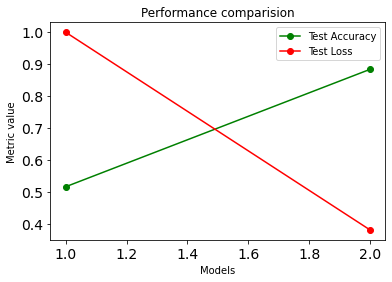

In [ ]:
lossx=[0.9989531636238098,0.3805207312107086]
x=[1,2]
accy=[0.515561580657959,0.8828999996185303]


plt.plot(x,accy,"green",label="Test Accuracy",marker="o")
plt.plot(x,lossx,"red",label="Test Loss",marker="o")
plt.title('Performance comparision')
plt.xlabel('Models')
plt.ylabel('Metric value')
plt.legend(loc="upper right")
plt.show()



In [ ]:
d="This is the best book happy dance"

In [ ]:
negsentim(d)

['This', 'is', 'the', 'best', 'book', 'happy', 'dance']


0.007352941176470588

In [ ]:
e="This is the not best book happy dance not sad"

In [ ]:
negsentim(e)

['This', 'is', 'the', 'not', 'best', 'book', 'happy', 'dance', 'not', 'sad']


0.001976284584980237

In [ ]:
f="This is the not best book happy dance sad"

In [ ]:
negsentim(f)

['This', 'is', 'the', 'not', 'best', 'book', 'happy', 'dance', 'sad']


-0.002380952380952381

In [ ]:
aa="This is best book"

In [ ]:
bb="This is not best book"

In [ ]:
sentim_score([aa])

0.1

In [ ]:
negsentim(aa)

['This', 'is', 'best', 'book']


0.011111111111111112

In [ ]:
sentim_score([bb])

0.08333333333333333

In [ ]:
negsentim(bb)

['This', 'is', 'not', 'best', 'book']


-0.007575757575757575

## ignore

In [ ]:
CountVec

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
#transform
Count_data = CountVec.fit_transform(flatList)


In [ ]:
Count_data

<267592x36483 sparse matrix of type '<class 'numpy.int64'>'
	with 1692262 stored elements in Compressed Sparse Row format>

In [ ]:
len(CountVec.get_feature_names())

36483

In [ ]:
Count_data.toarray()

In [ ]:

#create dataframe
cv_dataframe=pd.DataFrame(Count_data.toarray(),columns=CountVec.get_feature_names())
print(cv_dataframe)

## cont